# Introduction to data science: data

We'll explore the Pandas package for simple data handling tasks using geoscience data examples, and we'll follow it up with a quick look at `scikit-learn` for fitting machine learning models and making predictions.

## Reading a CSV

Pandas reads files from disk in tabular form &mdash; [here is a list](https://pandas.pydata.org/docs/user_guide/io.html) of all the formats that it can read and write. A very common format is CSV, so let's load one!

Conveniently, you can give `pandas` the CSV in a URL or a file path:

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/scienxlab/datasets/main/rpc/3-lithologies.csv"
df = pd.read_csv(url)
df.head()

,RPC,Description,Lithology,Vp,Vs,Rho
0,101023,Gray Shale,shale,4953.66,2957.26,2.71
1,100978,Olentangy Shale,shale,3444.66,2318.00,2.68
2,100993,Brown Gas Shale,shale,3507.80,2218.53,2.56
3,101048,Shale 2 (Density is assumed constant),shale,2988.89,1633.33,2.60
4,100417,Tight gas shale,shale,3642.00,2221.00,2.46


In [2]:
df.shape

(440, 6)

In [3]:
df.dtypes

RPC              int64
Description     object
Lithology       object
Vp             float64
Vs             float64
Rho            float64
dtype: object

## Exploring your data

- [ ] Get a column, plot a column
- [ ] Do some maths
- [ ] Use `df.loc`
- [ ] Change the index with `df.set_index()`
- [ ] Use `df.describe()` with `include='all'`

In [4]:
df['Lithology']

0         shale
1         shale
2         shale
3         shale
4         shale
         ...   
435    dolomite
436    dolomite
437    dolomite
438    dolomite
439    dolomite
Name: Lithology, Length: 440, dtype: object

In [5]:
df.loc[df['Vp']>5000, ['RPC', 'Vs', 'Rho']]

,RPC,Vs,Rho
17,100738,2262.08,2.55
22,101108,3024.00,2.78
29,101007,2944.80,2.56
32,100739,2276.11,2.55
66,101111,3040.00,2.78
...,...,...,...
432,102279,2739.50,2.56
436,102225,3116.80,2.44
437,102088,2998.69,2.57
438,102213,2933.07,2.44


In [6]:
type(df.loc[435])

pandas.core.series.Series

In [7]:
df = df.set_index('RPC')

In [8]:
df.iloc[435]

Description    R.PRICE 10909.5 #31
Lithology                 dolomite
Vp                         4625.98
Vs                         2759.19
Rho                           2.37
Name: 102178, dtype: object

In [9]:
df['Vp'] / 1000

RPC
101023    4.95366
100978    3.44466
100993    3.50780
101048    2.98889
100417    3.64200
           ...   
102178    4.62598
102225    5.44619
102088    5.44619
102213    5.34777
102086    5.34777
Name: Vp, Length: 440, dtype: float64

In [10]:
df.describe(include='all')

,Description,Lithology,Vp,Vs,Rho
count,440,440,440.000000,440.000000,428.000000
unique,74,3,NaN,NaN,NaN
top,Shale,shale,NaN,NaN,NaN
freq,31,200,NaN,NaN,NaN
mean,NaN,NaN,4241.400318,2404.569500,2.471659
std,NaN,NaN,1017.116305,623.491734,0.168290
min,NaN,NaN,1490.710000,839.570000,1.770000
25%,NaN,NaN,3444.245000,2008.362500,2.387500
50%,NaN,NaN,4396.045000,2559.060000,2.510000
75%,NaN,NaN,5150.920000,2858.630000,2.570000


### Exercise

- Have a quick look at [the Pandas documentation](https://pandas.pydata.org/docs/).
- How are the missing values distributed across the lithologies?
- Use your new library to compute the Gardner density estimate and put it in a new column called `Rho_Gardner`.
- Use `sns.kdeplot()` to compare the distribution of the new column to the actual `Rho` data. (You could also use `sns.histplot()` but it needs a bit of parameterization.)
- Fill the empty (NaN) values in density with your computed densities. <a title="Use `pd.Series.fillna()` on the 'Rho' column.">Hover for hint.</a>

In [11]:
df.groupby('Lithology').count()

,Description,Vp,Vs,Rho
Lithology,,,,
dolomite,200,200,200,200
limestone,40,40,40,28
shale,200,200,200,200


In [12]:
def gardner(vp): return 0.31*vp**0.25

In [13]:
# One way.
# from my_package import gardner

df['Rho_Gardner'] = gardner(df['Vp'])
df.count()

Description    440
Lithology      440
Vp             440
Vs             440
Rho            428
Rho_Gardner    440
dtype: int64

In [14]:
# Functional.
df['Rho_Gardner'] = df['Vp'].map(gardner)
df.count()

Description    440
Lithology      440
Vp             440
Vs             440
Rho            428
Rho_Gardner    440
dtype: int64

If we wanted to be more awesome, we could try fitting our own Gardner parameters to the data we have for this rock type.

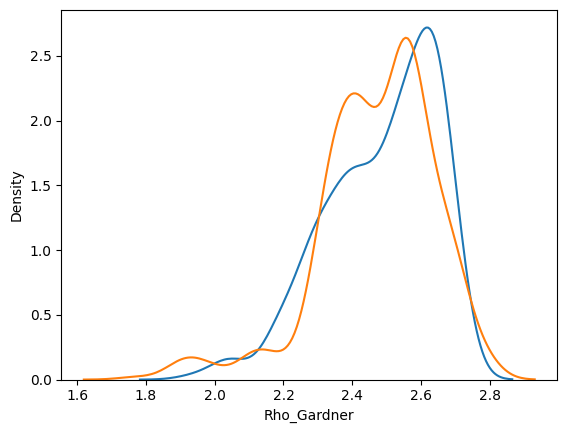

In [15]:
import seaborn as sns

ax = sns.kdeplot(df["Rho_Gardner"])
_ = sns.kdeplot(df['Rho'], ax=ax)

In [16]:
df['Rho'] = df['Rho'].fillna(df['Rho_Gardner'])
df.count()

Description    440
Lithology      440
Vp             440
Vs             440
Rho            440
Rho_Gardner    440
dtype: int64

## Visual exploration

We can easily visualize the properties of each facies and how they compare using a `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

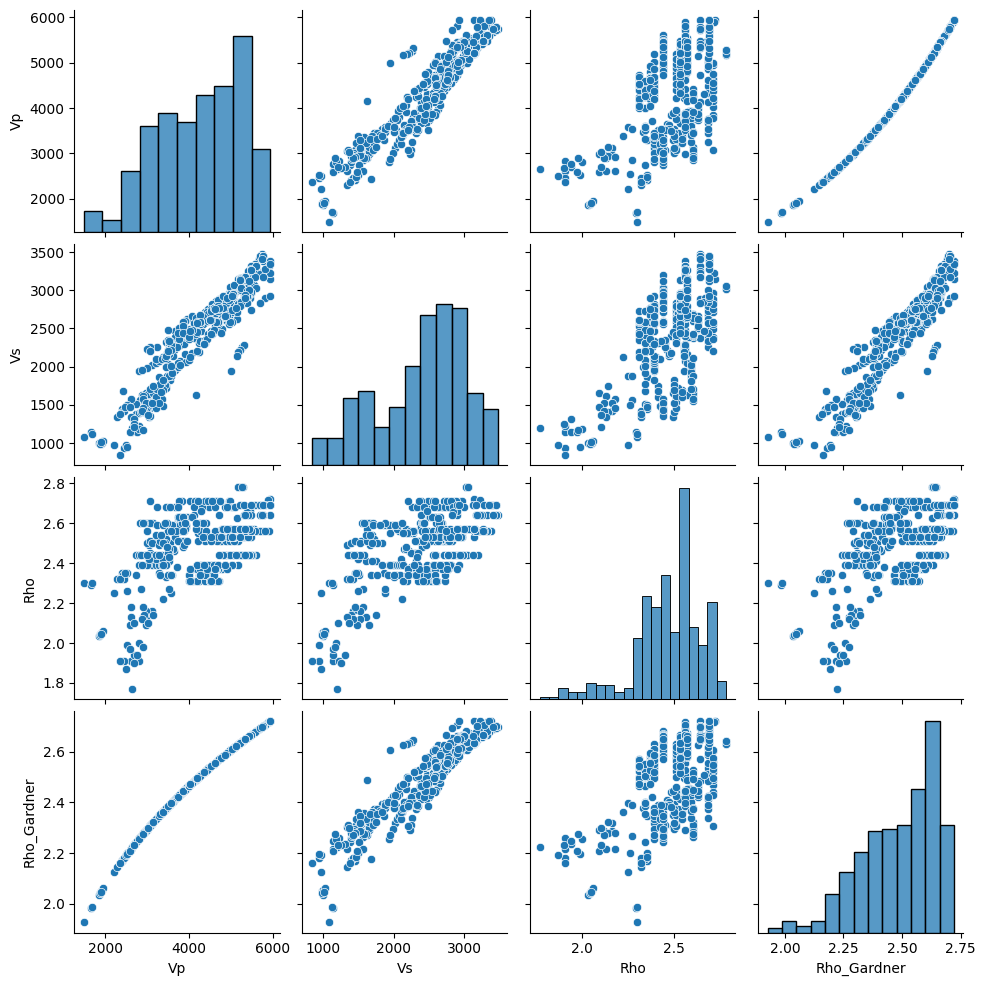

In [17]:
import seaborn as sns

sns.pairplot(df)

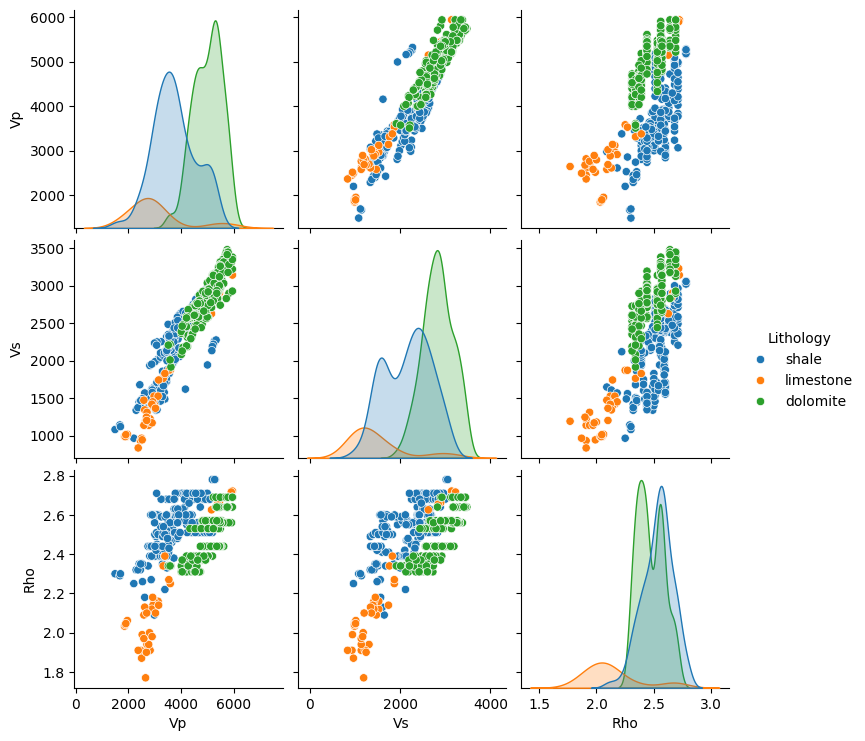

In [18]:
sns.pairplot(df,
             hue="Lithology",
             vars=['Vp','Vs','Rho'])

We can have a lot of control over all of the elements in the pair-plot by using the `PairGrid` object.

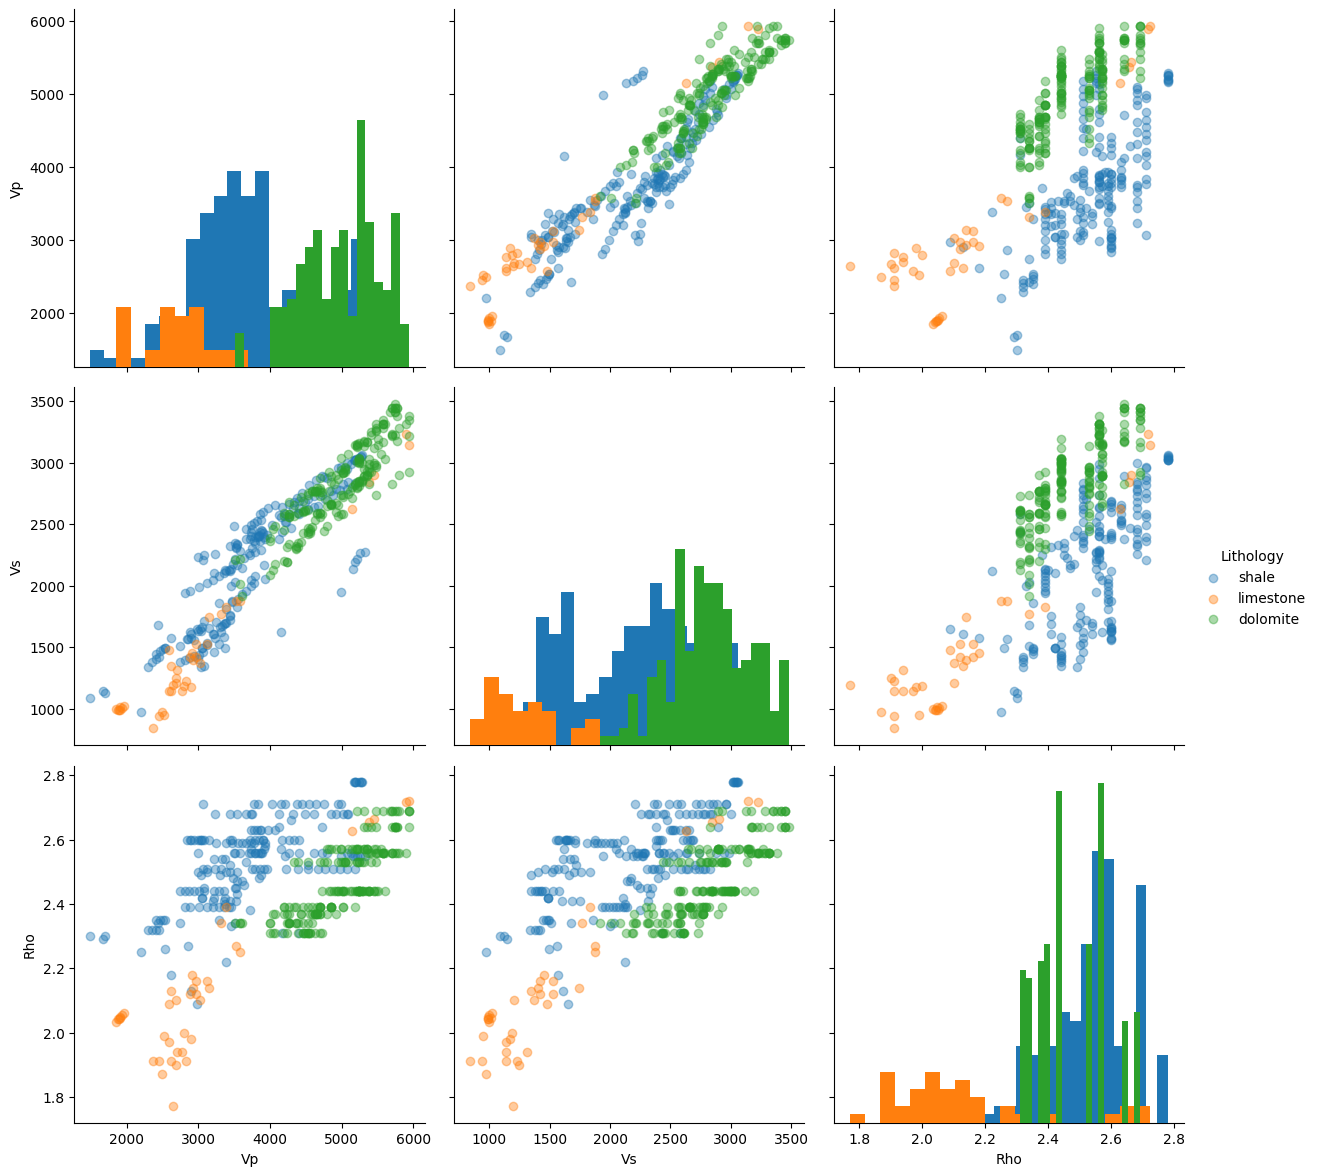

In [19]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df, hue="Lithology", vars=['Vp','Vs','Rho'], height=4)

g.map_upper(plt.scatter, alpha=0.4)  
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)  
g.add_legend()

## Export for machine learning

### EXERCISE

Export the following columns to a new CSV, in this order: Rho, Vp, Vs, and Lithology. Some details:

- Call the file `mydata.csv`.
- Use 3 decimal places for all floats.
- Make sure Pandas does not include the RPC catalog numbers.

In [26]:
df[['Rho', 'Vp', 'Vs', 'Lithology']].to_csv('mydata.csv', index=False, float_format='%.3f')

In [27]:
!head mydata.csv

Rho,Vp,Vs,Lithology
2.710,4953.660,2957.260,shale
2.680,3444.660,2318.000,shale
2.560,3507.800,2218.530,shale
2.600,2988.890,1633.330,shale
2.460,3642.000,2221.000,shale
2.710,4987.070,2963.490,shale
2.510,4395.760,2587.130,shale
2.630,3819.020,2521.050,shale
2.600,3033.330,1633.330,shale


<hr />

<p style="color:gray">©2024 Matt Hall / Equinor. Licensed CC BY.</p>